In [1]:
import numpy as np
import os
import time

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras
import keras.applications as kapp
from keras.datasets import cifar10
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten
from keras.optimizers import SGD

from keras.models import Sequential

import png as png
from keras import metrics

print metrics,dir(metrics)
from keras import backend as K

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
batch_size = 40
testb_size = 40
x_testb = x_train[:testb_size]
#x_train = np.repeat(np.repeat(x_train, 7, axis=1), 7, axis=2)
num_classes=11

epochs = 6

Using plaidml.keras.backend backend.


<module 'keras.metrics' from '/Users/jonathanmiller/plaidml-venv/lib/python2.7/site-packages/keras/metrics.pyc'> ['K', 'MAE', 'MAPE', 'MSE', 'MSLE', '__builtins__', '__doc__', '__file__', '__name__', '__package__', 'absolute_import', 'binary_accuracy', 'binary_crossentropy', 'categorical_accuracy', 'categorical_crossentropy', 'cosine', 'cosine_proximity', 'deserialize', 'deserialize_keras_object', 'division', 'get', 'hinge', 'kullback_leibler_divergence', 'logcosh', 'mae', 'mape', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_error', 'mean_squared_logarithmic_error', 'mse', 'msle', 'poisson', 'print_function', 'serialize', 'serialize_keras_object', 'six', 'sparse_categorical_accuracy', 'sparse_categorical_crossentropy', 'sparse_top_k_categorical_accuracy', 'squared_hinge', 'top_k_categorical_accuracy']


In [2]:
for i in range(3):
    features_i = x_train[i,::]
    mag=7
    #print features_i,features_i.shape
    features_i = np.repeat(np.repeat(features_i, mag, axis=0), mag, axis=1)
    im = np.transpose(features_i,(1,2,0))
    height, width, depth = features_i.shape
    name = str(i)+'testinput.png'
    fpng = open(name, 'wb')
    w = png.Writer(width,height)
    pngWriter = png.Writer(width, height,
                           greyscale=False,
                           alpha=False,
                           bitdepth=16)
    w.write(fpng,np.reshape(features_i, (-1, width*3)))
    fpng.close()

In [3]:
from IPython.display import Image


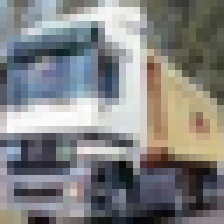

In [4]:
Image(filename='1testinput.png') 

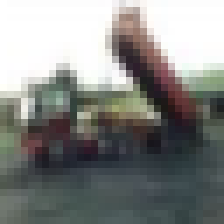

In [5]:
Image(filename='2testinput.png') 

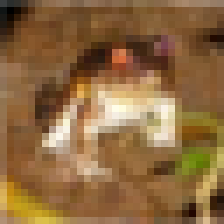

In [6]:
Image(filename='0testinput.png') 

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()

firstlayer=Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3))
model.add(firstlayer)
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))

INFO:plaidml:Opening device "metal_intel(r)_iris(tm)_plus_graphics_640.0"


In [8]:
model.add(Dropout(0.25))



In [9]:
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd,metrics=['categorical_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28L, 28L, 8)       584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26L, 26L, 16)      1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24L, 24L, 16)      2320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24L, 24L, 16L)     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                294944    
__________

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_testb = x_testb.astype('float32')
x_train /= 255
x_test /= 255
x_testb /= 255


firstlayerw = firstlayer.get_weights()[0][:,:,0,:]

In [12]:
for i in range(2):
    name = str(i)+'testinputkernely.png'
    fpng = open(name, 'wb')
    mag=100
    w = png.Writer(3*mag,3*mag)
    im = np.repeat(np.repeat(firstlayerw[:,:,i]+0.5, mag, axis=0), mag, axis=1)
    im=im*255
    #print firstlayerw[:,:,i],firstlayerw[:,:,i].shape
    #print im,im.shape
    pngWriter = png.Writer(width, height,
                           greyscale=True,
                           alpha=False,
                           bitdepth=16)
    w.write(fpng,im)
    fpng.close()

In [13]:
Image(filename='0testinputkernely.png')

In [14]:
#help(png)

In [15]:
Image(filename='1testinputkernely.png')

In [16]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/6


INFO:plaidml:Analyzing Ops: 134 of 262 operations complete


50000/50000 [==============================] - 88s 2ms/step - loss: 0.0814 - categorical_accuracy: 0.1434 - val_loss: 0.0786 - val_categorical_accuracy: 0.2083
Epoch 2/6
50000/50000 [==============================] - 84s 2ms/step - loss: 0.0787 - categorical_accuracy: 0.2072 - val_loss: 0.0759 - val_categorical_accuracy: 0.2676
Epoch 3/6
50000/50000 [==============================] - 81s 2ms/step - loss: 0.0773 - categorical_accuracy: 0.2364 - val_loss: 0.0745 - val_categorical_accuracy: 0.3102
Epoch 4/6
50000/50000 [==============================] - 76s 2ms/step - loss: 0.0761 - categorical_accuracy: 0.2585 - val_loss: 0.0729 - val_categorical_accuracy: 0.3251
Epoch 5/6
50000/50000 [==============================] - 75s 1ms/step - loss: 0.0752 - categorical_accuracy: 0.2775 - val_loss: 0.0717 - val_categorical_accuracy: 0.3505
Epoch 6/6
50000/50000 [==============================] - 75s 1ms/step - loss: 0.0741 - categorical_accuracy: 0.2985 - val_loss: 0.0709 - val_categorical_accurac

In [17]:
firstlayerw = firstlayer.get_weights()[0][:,:,0,:]
for i in range(2):
    name = str(i)+'testoutputkernely.png'
    fpng = open(name, 'wb')
    mag=100
    w = png.Writer(3*mag,3*mag)
    im = np.repeat(np.repeat(firstlayerw[:,:,i]+0.5, mag, axis=0), mag, axis=1)
    im=im*255
    #print firstlayerw[:,:,i],firstlayerw[:,:,i].shape
    #print im,im.shape
    pngWriter = png.Writer(width, height,
                           greyscale=True,
                           alpha=False,
                           bitdepth=16)
    w.write(fpng,im)
    fpng.close()

In [18]:
Image(filename='0testoutputkernely.png')

In [19]:
Image(filename='1testoutputkernely.png')

In [20]:
inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp]+ [K.learning_phase()], outputs ) # evaluation function

In [21]:
for i in range(1):
    #print x_testb.shape
    features_i = x_testb[3,::]*255
    #print features_i,features_i.shape
    mag=7
    #print features_i
    features_i = np.repeat(np.repeat(features_i, mag, axis=0), mag, axis=1)
    im = np.transpose(features_i,(1,2,0))
    height, width, depth = features_i.shape
    name = str(i)+'testinputpic.png'
    fpng = open(name, 'wb')
    w = png.Writer(width,height)
    pngWriter = png.Writer(width, height,
                           greyscale=False,
                           alpha=False,
                           bitdepth=16)
    w.write(fpng,np.reshape(features_i, (-1, width*3)))
    fpng.close()

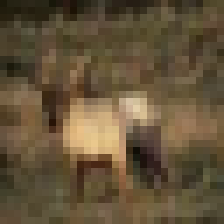

In [22]:
Image(filename='0testinputpic.png')

In [27]:
layer_outs = functor([x_testb, 1.])
for i in range(7):
    #print x_testb.shape
    features_i = layer_outs[0][3]*125
    #print features_i.shape
    mag=7
    #print features_i
    features_i = np.repeat(np.repeat(features_i, mag, axis=0), mag, axis=1)
    im = np.transpose(features_i,(2,1,0))
    print im.shape,im[i].shape
    #im = np.transpose(im[0],(2,1,0))
    height, width =im[i].shape
    name = str(i)+'testoutputpic.png'
    fpng = open(name, 'wb')
    print width,height
    w = png.Writer(width,height)
    pngWriter = png.Writer(width, height,
                           greyscale=True,
                           alpha=False,
                           bitdepth=16)
    w.write(fpng,np.reshape(im[i], (-1, width*1)))
    fpng.close()


(8, 210, 210) (210, 210)
210 210
(8, 210, 210) (210, 210)
210 210
(8, 210, 210) (210, 210)
210 210
(8, 210, 210) (210, 210)
210 210
(8, 210, 210) (210, 210)
210 210
(8, 210, 210) (210, 210)
210 210
(8, 210, 210) (210, 210)
210 210


In [28]:
Image(filename='0testoutputpic.png')

In [30]:
Image(filename='1testoutputpic.png')

In [29]:
Image(filename='2testoutputpic.png')

In [31]:
Image(filename='3testoutputpic.png')

In [32]:
Image(filename='4testoutputpic.png')

In [33]:
Image(filename='5testoutputpic.png')

In [34]:
Image(filename='6testoutputpic.png')

In [ ]:
#Image(filename='7testoutputpic.png')

In [44]:
for i in range(7):
    #print x_testb.shape
    features_i = layer_outs[1][3]*125
    #print features_i.shape
    mag=7
    #print features_i
    features_i = np.repeat(np.repeat(features_i, mag, axis=0), mag, axis=1)
    im = np.transpose(features_i,(2,1,0))
    #print im.shape,im[i].shape
    #im = np.transpose(im[0],(2,1,0))
    height, width =im[i].shape
    name = str(i)+'testoutputpic2.png'
    fpng = open(name, 'wb')
    print width,height
    w = png.Writer(width,height)
    pngWriter = png.Writer(width, height,
                           greyscale=True,
                           alpha=False,
                           bitdepth=16)
    w.write(fpng,np.reshape(im[i], (-1, width*1)))
    fpng.close()

196 196
196 196
196 196
196 196
196 196
196 196
196 196


In [36]:
Image(filename='0testoutputpic2.png')

In [37]:
Image(filename='1testoutputpic2.png')

In [38]:
Image(filename='2testoutputpic2.png')

In [39]:
Image(filename='3testoutputpic2.png')

In [40]:
Image(filename='4testoutputpic2.png')

In [41]:
Image(filename='5testoutputpic2.png')

In [42]:
Image(filename='6testoutputpic2.png')

In [ ]:
#Image(filename='7testoutputpic2.png')